In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv("E:/internship/TASK 4/Tweets.csv")

df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [5]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [6]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df.shape

(14640, 15)

In [13]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [15]:
id_types = df['tweet_id'].value_counts()
id_types

tweet_id
5.696670e+17    28
5.696040e+17    28
5.696270e+17    26
5.702720e+17    26
5.696200e+17    25
                ..
5.676230e+17     1
5.676140e+17     1
5.675960e+17     1
5.675950e+17     1
5.679500e+17     1
Name: count, Length: 2434, dtype: int64

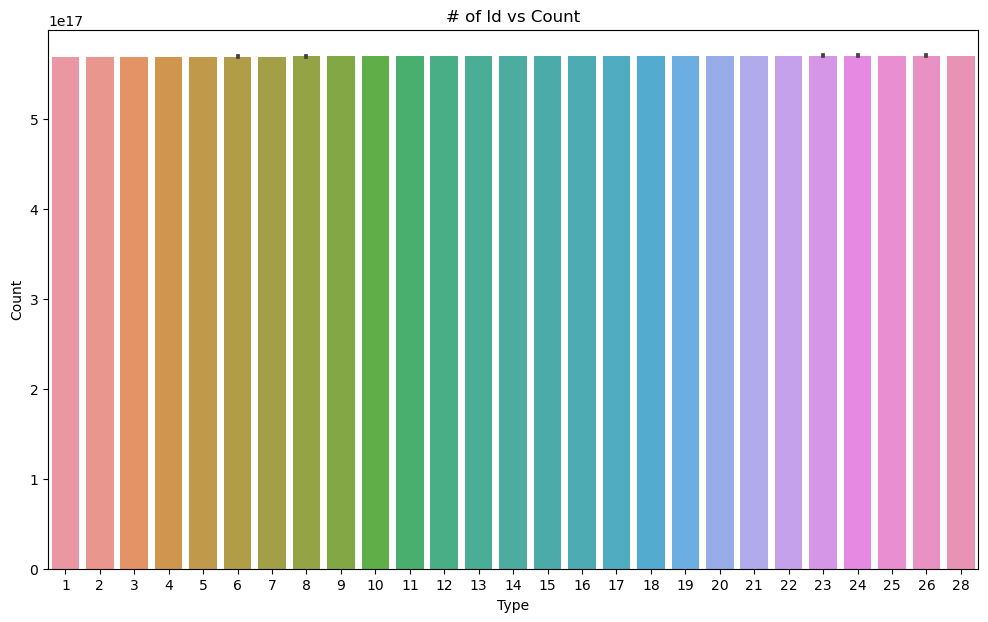

In [17]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [19]:
game_types = df['name'].value_counts()
game_types

name
JetBlueNews       63
kbosspotter       32
_mhertz           29
otisday           28
throthra          27
                  ..
ChrisJLeary        1
tracy_edes         1
NGottesman         1
chadlacalamita     1
sanyabun           1
Name: count, Length: 7701, dtype: int64

In [21]:
sentiment_types = df['airline_sentiment'].value_counts()
sentiment_types

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

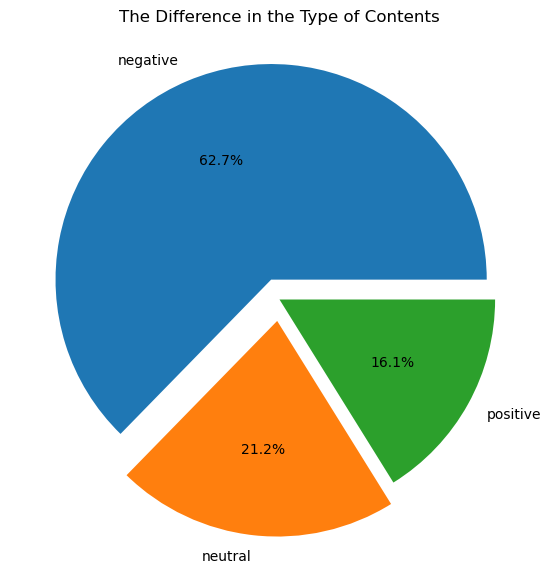

In [23]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0])
plt.title('The Difference in the Type of Contents')
plt.show()

In [25]:
df = df.drop(['tweet_id'],axis=1)

df


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/2015 12:01,NaN,NaN
14636,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/2015 11:59,Texas,NaN
14637,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/2015 11:59,"Nigeria,lagos",NaN
14638,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [27]:
df.nunique()

airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                    6804
tweet_location                   3081
user_timezone                      85
dtype: int64

In [29]:
stop_words = set(stopwords.words('english'))

In [31]:
def preprocess_tweet(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove @mentions and hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text_tokens = word_tokenize(text)  # Tokenize the text
    filtered_words = [word for word in text_tokens if word not in stop_words]  # Remove stopwords
    return " ".join(filtered_words)

In [33]:
df['cleaned_text'] = df['text'].apply(preprocess_tweet)

In [34]:
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [37]:
df['airline_sentiment'].value_counts()


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [39]:
sns.set_style("whitegrid")

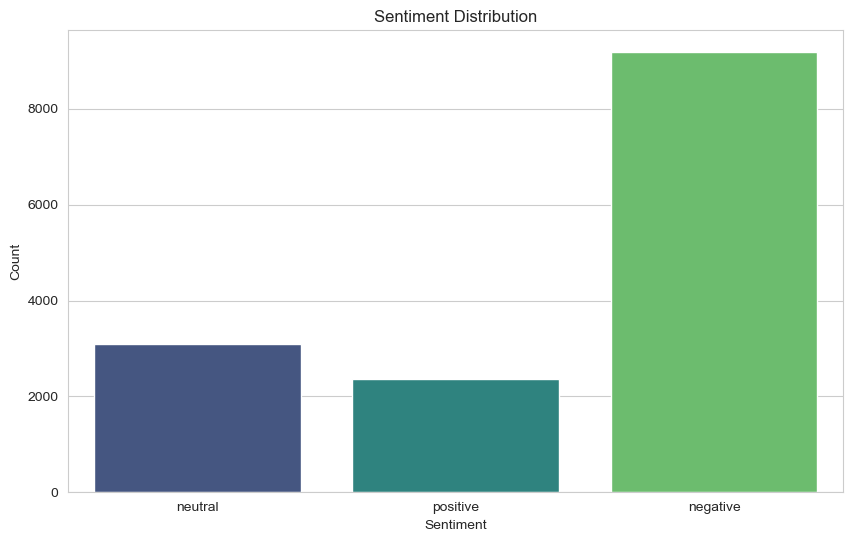

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='airline_sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

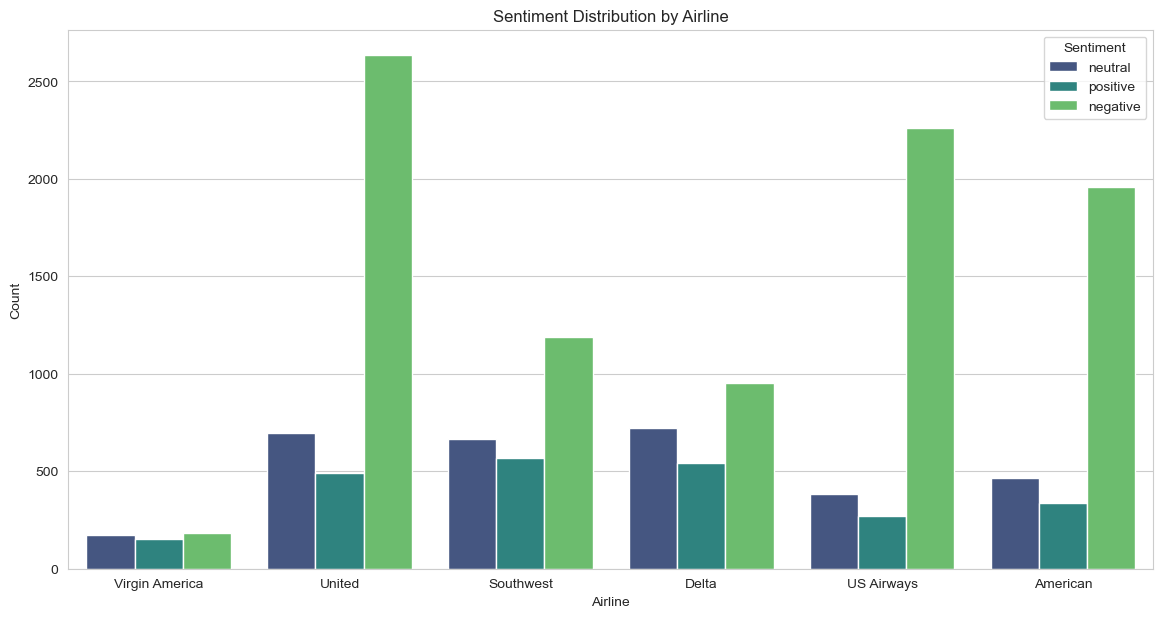

In [43]:
plt.figure(figsize=(14,7))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [45]:
!pip install wordcloud


In [46]:
from wordcloud import WordCloud


In [47]:
df = pd.DataFrame({'airline_sentiment': ['positive', 'negative', 'positive', 'negative', 'positive'], 'text': ['good flight', 'bad flight', 'great service', 'awful experience', 'wonderful journey']})
positive_text = ' '.join(df[df['airline_sentiment'] == 'positive']['text'])
negative_text = ' '.join(df[df['airline_sentiment'] == 'negative']['text'])


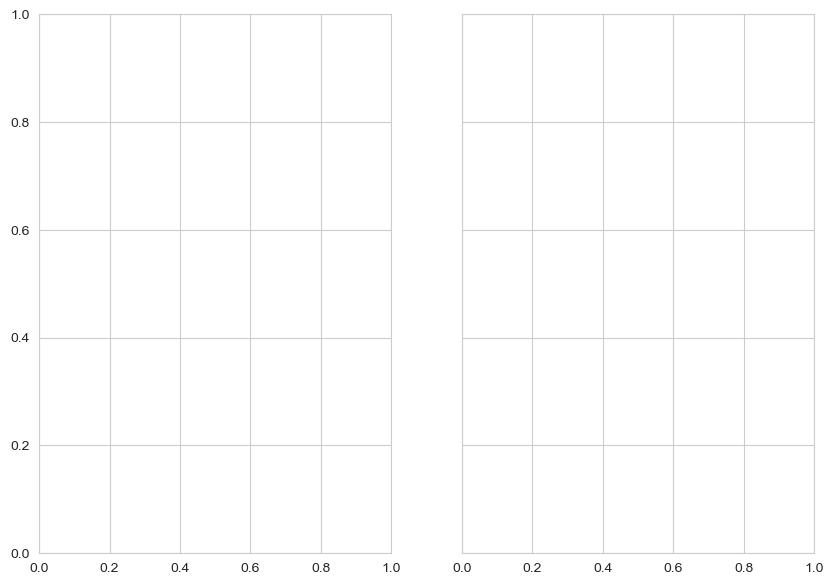

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7), sharex=True, sharey=True)

In [53]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Positive Sentiment Wordcloud')
axes[0].axis('off')

(-0.5, 799.5, 399.5, -0.5)

In [55]:
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Negative Sentiment Wordcloud')
axes[1].axis('off')

(-0.5, 799.5, 399.5, -0.5)

In [57]:
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

<Figure size 640x480 with 0 Axes>